In [264]:
# import the data libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import math
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from scipy.spatial import ConvexHull
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree




RANDOM_STATE = 42

In [173]:
#read our dataset from the file 
data = pd.read_csv('fraud_data.csv')

#get the first 10 rows from the data set
data.head(10)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
5,05-01-2019 03:15,"""Raynor, Reinger and Hagenes""",gas_transport,20.45,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,ef010a5f4f570d306a050a368ee2729d,64.088838,-165.104078,1
6,05-01-2019 03:21,Heller-Langosh,gas_transport,18.19,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,8e2d2fae5319d31c887dddbc70627ac4,63.917785,-165.827621,1
7,05-01-2019 11:31,Padberg-Welch,grocery_pos,367.29,Browning,MO,40.0290,-93.1607,602,Cytogeneticist,14-07-1954,5fbe827807ec9f557f6242bb48db0e51,39.167065,-93.705245,1
8,05-01-2019 18:03,McGlynn-Heathcote,misc_net,768.15,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,fba83e0a3adb530251295ab72a96b719,64.623325,-166.403973,1
9,05-01-2019 22:02,Dooley-Thompson,misc_net,849.49,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,b87c92d4824758e704da572891697fed,65.266065,-164.865352,1


In [174]:
#describe the data
data.describe()

,amt,lat,long,city_pop,merch_lat,merch_long
count,14446.000000,14446.000000,14446.000000,1.444600e+04,14446.000000,14446.000000
mean,124.430073,39.787692,-110.874225,1.065370e+05,39.787991,-110.874892
std,231.352587,5.317039,12.985813,2.902916e+05,5.360593,12.995596
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685
25%,12.080000,36.715400,-120.415800,4.930000e+02,36.794655,-120.146253
50%,51.520000,39.666200,-111.098500,1.645000e+03,39.620953,-111.192629
75%,101.030000,41.940400,-101.136000,3.543900e+04,42.275740,-100.446822
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366


In [175]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [176]:
data['is_fraud'].value_counts()

0                         12600
1                          1844
1"2020-12-24 16:56:24"        1
0"2019-01-01 00:00:44"        1
Name: is_fraud, dtype: int64

In [177]:
#drop the merchant, trans_num column for now for easier data digestion
data = data[data['is_fraud'].isin(['1', '0'])]
data = data.drop(columns=['merchant', 'trans_num'])
data.head(10)


,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,65.654142,-164.722603,1
1,04-01-2019 15:06,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,65.468863,-165.473127,1
2,04-01-2019 22:37,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,65.347667,-165.914542,1
3,04-01-2019 23:06,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,64.445035,-166.080207,1
4,04-01-2019 23:59,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,65.447094,-165.446843,1
5,05-01-2019 03:15,gas_transport,20.45,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,64.088838,-165.104078,1
6,05-01-2019 03:21,gas_transport,18.19,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,63.917785,-165.827621,1
7,05-01-2019 11:31,grocery_pos,367.29,Browning,MO,40.0290,-93.1607,602,Cytogeneticist,14-07-1954,39.167065,-93.705245,1
8,05-01-2019 18:03,misc_net,768.15,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,64.623325,-166.403973,1
9,05-01-2019 22:02,misc_net,849.49,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,65.266065,-164.865352,1


In [178]:
data['is_fraud'].value_counts() #making sure that the columns were dropped

0    12600
1     1844
Name: is_fraud, dtype: int64

In [179]:
#seeing what percentage of transactions are fraud or valid
valid = data[data_drop['is_fraud'] == '0']
fraud = data[data_drop['is_fraud'] == '1']

#how much of the data set is fraud
percentage_of_fraud = len(fraud) / len(data_drop)

#fraud to valid transaction ratio
fraud_valid_ratio = len(fraud) / len(valid)

print("The percentage of fraud in this dataset is", round(percentage_of_fraud, 4) * 100)
print("Number of fraud cases: ", len(fraud));
print("Number of valid transactions: ", len(valid));

data.head()

The percentage of fraud in this dataset is 12.76
Number of fraud cases:  1844
Number of valid transactions:  12600


C:\Users\yaren\AppData\Local\Temp\ipykernel_44044\2919438683.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  valid = data[data_drop['is_fraud'] == '0']
C:\Users\yaren\AppData\Local\Temp\ipykernel_44044\2919438683.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fraud = data[data_drop['is_fraud'] == '1']


,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,65.654142,-164.722603,1
1,04-01-2019 15:06,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,65.468863,-165.473127,1
2,04-01-2019 22:37,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,65.347667,-165.914542,1
3,04-01-2019 23:06,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,64.445035,-166.080207,1
4,04-01-2019 23:59,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,65.447094,-165.446843,1


In [180]:
#what states this data set includes
print(data['state'].unique())

#how many states there are
print(len(data['state'].unique()))

#the unique cities are there
print(data['city'].unique())

#how many cities there are
print(len(data['city'].unique()))

#we see here that not all 50 states are included in this data set
#the states are located in western US

#There are 13 total states
#There are 176 unique cities

['AK' 'MO' 'NE' 'CA' 'UT' 'OR' 'WY' 'NM' 'AZ' 'WA' 'CO' 'ID' 'HI']
13
['Wales' 'Browning' 'Ravenna' 'San Jose' 'Westerville' 'Thompson'
 'Parker Dam' 'San Diego' 'Centerview' 'Vacaville' 'La Grande'
 'Port Costa' 'Meadville' 'Alva' 'Lowell' 'Albuquerque' 'Lamy' 'Hubbell'
 'Fort Washakie' 'Saint Louis' 'Kansas City' 'Arnold' 'Mesa' 'Daly City'
 'Lonetree' 'Napa' 'Kaktovik' 'Coulee Dam' 'Aurora' 'Utica' 'Roseland'
 'Newhall' 'Fields Landing' 'June Lake' 'Eugene' 'Blairsden-Graeagle'
 'Pueblo' 'Campbell' 'Moab' 'Tomales' 'Red Cliff' 'Downey' 'Smith River'
 'Riverton' 'Conway' 'Syracuse' 'Grenada' 'Jelm' 'Unionville'
 'Scotts Mills' 'Cardwell' 'Manley' 'Lagrange' 'American Fork'
 'Rock Springs' 'Tekoa' 'Independence' 'Sun City' 'Arvada' 'Williamsburg'
 'Monitor' 'Sacramento' 'Claremont' 'Hawthorne' 'Valentine' 'Matthews'
 'Helm' 'Kent' 'Glendale' 'Humboldt' 'Colorado Springs' 'Fiddletown'
 'Omaha' 'Yellowstone National Park' 'Phoenix' 'Nelson' 'Colton'
 'Moriarty' 'Parker' 'Wappapello' 'We

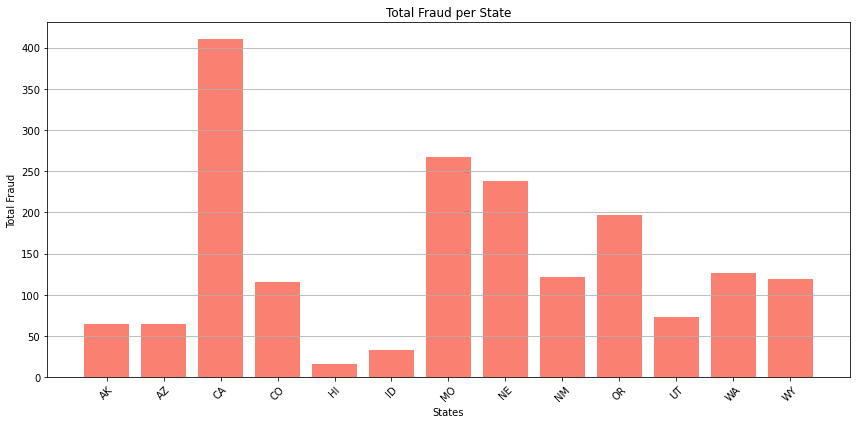

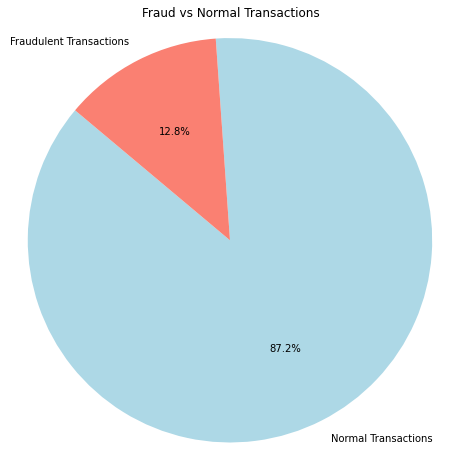

In [228]:
# Assuming data_drop is already defined and contains the necessary data
data_copy = pd.DataFrame(data)

# Cleaning our fraud data
# Check the unique values in 'is_fraud' feature
unique = data_copy['is_fraud'].value_counts()
# print(unique)

# Drop rows where the 'is_fraud' column contains a string date
data_copy = data_copy[data_copy['is_fraud'].isin(['0', '1'])]

# Convert 'is_fraud' to integer
data_copy['is_fraud'] = data_copy['is_fraud'].astype(int)

# Bar graph of states and fraud
total_fraud_per_state = data_copy.groupby('state')['is_fraud'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(total_fraud_per_state['state'], total_fraud_per_state['is_fraud'], color='salmon')
plt.title('Total Fraud per State')
plt.xlabel('States')
plt.ylabel('Total Fraud')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines for better readability of values
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

# Pie chart showing the amount of fraud vs normal transactions
fraud_counts = data_copy['is_fraud'].value_counts()
labels = ['Normal Transactions', 'Fraudulent Transactions']
sizes = [fraud_counts.get(0, 0), fraud_counts.get(1, 0)]  # Get counts of 0 and 1

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'salmon'])
plt.title('Fraud vs Normal Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


In [255]:
## Random Forest

# Convert `trans_date_trans_time` to datetime
# data_copy['trans_date_trans_time'] = pd.to_datetime(data_copy['trans_date_trans_time'], format='%d-%m-%Y %H:%M')

# Extract date and time features
# data_copy['hour'] = data_copy['trans_date_trans_time'].dt.hour
# data_copy['day'] = data_copy['trans_date_trans_time'].dt.day
# data_copy['month'] = data_copy['trans_date_trans_time'].dt.month
# data_copy['year'] = data_copy['trans_date_trans_time'].dt.year

# Drop the original `trans_date_trans_time` column
# data_copy = data_copy.drop(columns=['trans_date_trans_time'])

# # One-hot encoding categorical features
# categorical_cols = ['category', 'city', 'state', 'job']
# data_copy = pd.get_dummies(data_copy, columns=categorical_cols, drop_first=True)

# X = data_copy.drop(columns=['is_fraud'])
# y = data_copy['is_fraud']

# # Split into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

# # Train a Random Forest Classifier
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

# # Make predictions
# y_pred = rf.predict(X_test)

# # Evaluate the model
# print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# print(classification_report(y_test, y_pred))

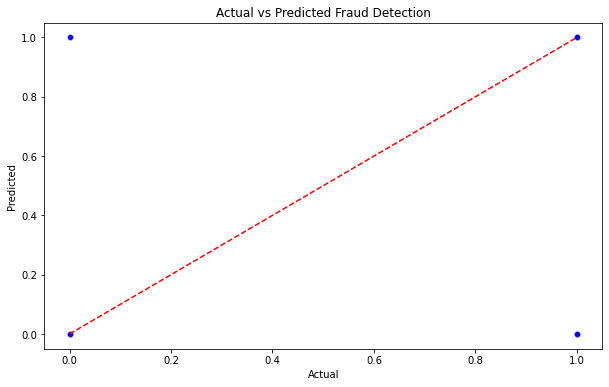

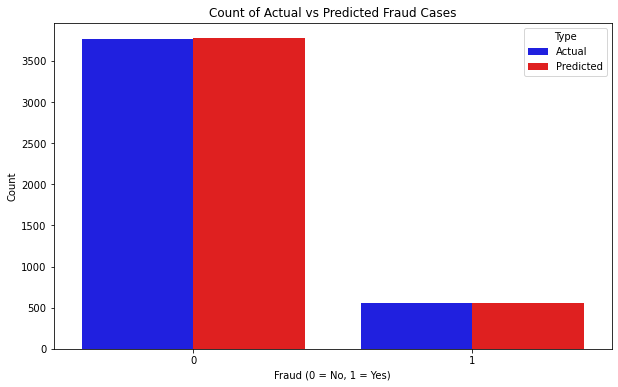

In [183]:
# ## Plot
# results_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred
# })

# #line
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Actual', y='Predicted', data=results_df, color='blue', alpha=0.6)
# plt.plot([0, 1], [0, 1], 'r--')
# plt.title('Actual vs Predicted Fraud Detection')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.show()

# #bar
# # Reshape the DataFrame to long format 
# results_df_melted = pd.melt(results_df, var_name='Type', value_name='Value')

# # Plo to distinguish between actual and predicted 
# plt.figure(figsize=(10, 6))
# sns.countplot(x='Value', hue='Type', data=results_df_melted, palette={'Actual': 'blue', 'Predicted': 'red'})

# plt.title('Count of Actual vs Predicted Fraud Cases')
# plt.xlabel('Fraud (0 = No, 1 = Yes)')
# plt.ylabel('Count')
# plt.show()


In [232]:
#add age into the dataframe using the transaction date and date of birth
#make the data frame to use for the rest of the code
data['dob'] = pd.to_datetime(data['dob'], format='%d-%m-%Y')
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], format='%d-%m-%Y %H:%M')
data['age'] = (data['trans_date_trans_time'] - data['dob']).dt.days // 365

data['hour'] = data['trans_date_trans_time'].dt.hour
data.head()

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,distance_miles,age,hour
0,2019-01-04 00:58:00,grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,65.654142,-164.722603,1,67.979696,79,0
1,2019-01-04 15:06:00,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,65.468863,-165.473127,1,49.673972,79,15
2,2019-01-04 22:37:00,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,65.347667,-165.914542,1,41.557019,79,22
3,2019-01-04 23:06:00,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,64.445035,-166.080207,1,24.655214,79,23
4,2019-01-04 23:59:00,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,65.447094,-165.446843,1,48.277270,79,23


In [222]:
#compare the credit card holder's lat and long to the transactions lat and long
def distance_calculation(lat1, long1, lat2, long2):
    
    radius = 3963 # radius in earth in miles

    lat1 = math.radians(lat1)
    lat2 = math.radians(lat2)
    long1 = math.radians(long1)
    long2 = math.radians(long2)
    
    #Haversine function. Source :https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
    lat_dist = lat2 - lat1
    long_dist = long2 - long1
    
    a = math.sin(lat_dist / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(long_dist / 2) ** 2
    c = 2 * math.asin(math.sqrt(a))
    distance = radius * c
    
    return distance


#gonna make sure that all columns are numeric
data['lat'] = pd.to_numeric(data['lat'], errors='coerce')
data['long'] = pd.to_numeric(data['long'], errors='coerce')
data['merch_lat'] = pd.to_numeric(data['merch_lat'], errors='coerce')
data['merch_long'] = pd.to_numeric(data['merch_long'], errors='coerce')

data = data.dropna(subset=['lat', 'long', 'merch_lat', 'merch_long'])
#apply the distance formula row by row and add new distance column
data['distance_miles'] = data.apply(lambda row: distance_calculation(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis = 1)

(data.sort_values(by='distance_miles', ascending=False)).head() #make sure the data frame has distance in miles the purchase was made

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,distance_miles,age
2643,2020-12-26 00:39:00,grocery_pos,108.74,Laguna Hills,CA,33.6150,-117.7114,45303,Sales executive,1969-12-22,32.628952,-116.716271,0,89.299677,51
5064,2020-12-28 17:08:00,personal_care,9.65,Glendale,CA,34.1556,-118.2322,172817,Advertising account planner,1982-07-30,35.143466,-119.224508,0,88.637089,38
1445,2020-07-21 22:59:00,grocery_pos,293.98,Honokaa,HI,20.0827,-155.4880,4878,Physiotherapist,1966-12-03,20.964497,-156.480766,1,88.630936,53
9512,2019-01-06 16:38:00,health_fitness,13.41,Albuquerque,NM,35.0561,-106.5506,641349,Charity officer,1967-01-24,36.046684,-107.540253,0,88.293987,51
2683,2020-12-26 02:01:00,misc_net,3.31,Hawthorne,CA,33.9143,-118.3493,93193,"""Editor, magazine features""",1995-04-19,32.946811,-119.343394,0,88.151675,25


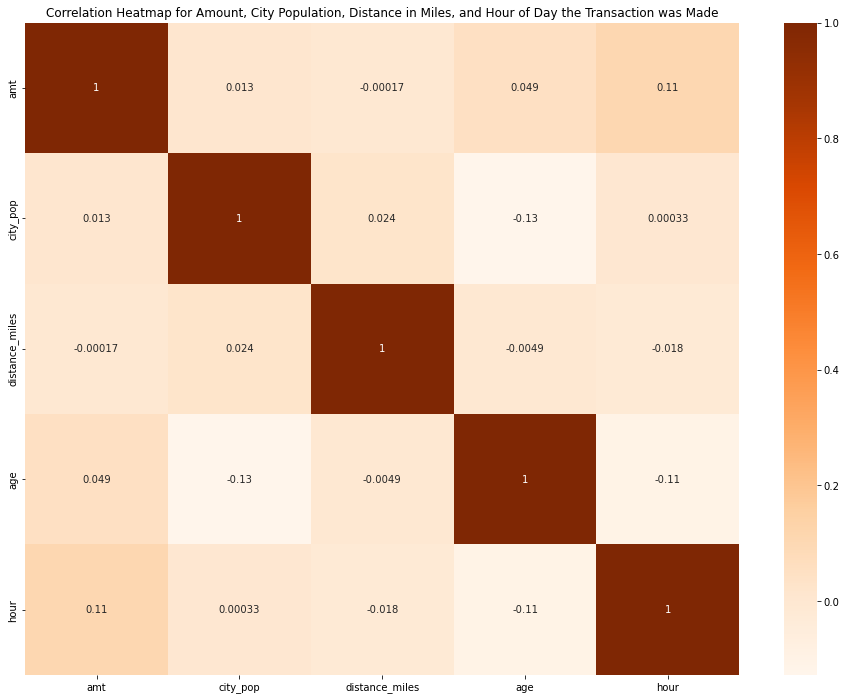

In [233]:
quantdata = data[["amt", "city_pop", "distance_miles", "age", "hour"]]
corr_matrix = quantdata.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='Oranges')
plt.title("Correlation Heatmap for Amount, City Population, Distance in Miles, and Hour of Day the Transaction was Made")
plt.show()

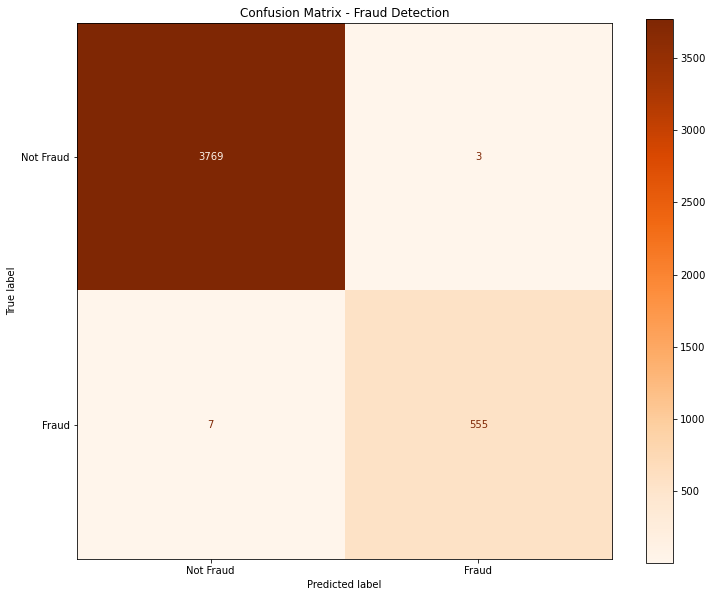

In [186]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Oranges, ax=ax)

plt.title('Confusion Matrix - Fraud Detection')
plt.show()

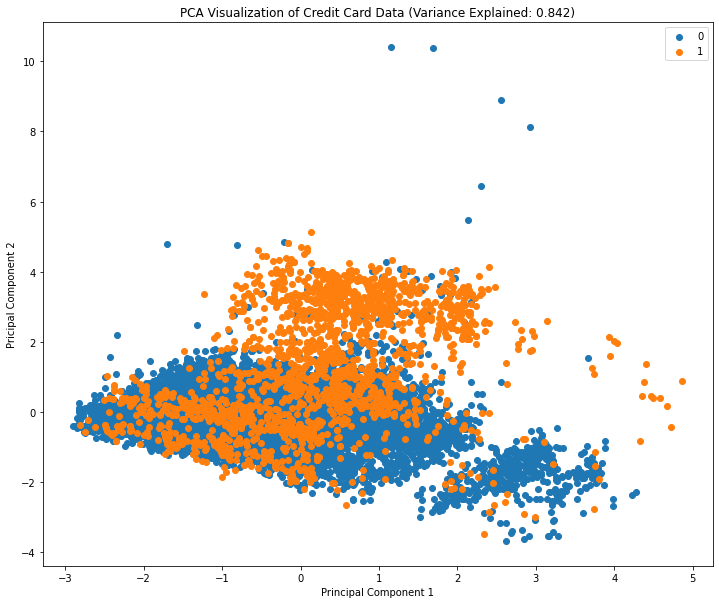

In [237]:
# Load from library
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_new = data[["amt", "city_pop", "distance_miles", "age", "is_fraud", "hour"]]

X_new = data_new[["amt", "city_pop", "distance_miles", "age", "hour"]]
y_new = data_new['is_fraud']
           
#standardize features:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

#perform PCA reduction
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)
var_explained_by_2PCs = np.round(np.sum(pca.explained_variance_ratio_), 3)

plt.figure(figsize = (12, 10))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label =str(label))
plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Pricipal Component 2")
plt.title(f"PCA Visualization of Credit Card Data (Variance Explained: {var_explained_by_2PCs})")
plt.show()



In [238]:
km = KMeans(n_clusters=3, random_state=RANDOM_STATE)

# Fit the model 
km.fit(X_pca)
# Extract the model output centroids
km_centroids = km.cluster_centers_

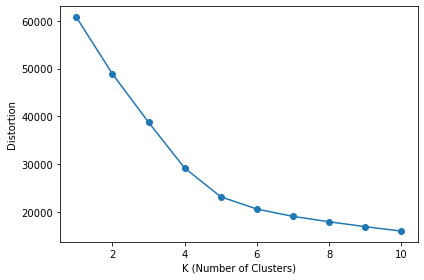

In [239]:
distortions = []
for k in range(1, 11):
    km=KMeans(n_clusters=k, random_state=RANDOM_STATE)
    km.fit(X_pca)
    # Store inertia score of each run in the list:
    distortions.append(km.inertia_)
    
### END SOLUTION

plt.plot(range(1, 11), distortions, marker = "o")
plt.xlabel("K (Number of Clusters)")
plt.ylabel("Distortion")
plt.tight_layout()
plt.show()

In [240]:
def initialize_clusters(X, k, seed = RANDOM_STATE):    
    np.random.seed(seed)
    clusters = {}

    for cluster_id in range(k):
        centroid = X[np.random.choice(X.shape[0])] 
        samples = []
        cluster = {
            "centroid": centroid,
            "samples" : samples,
        }
        clusters[cluster_id] = cluster
        
    return clusters

In [241]:
def distance(p1, p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist


In [248]:
def assign_clusters(X, clusters):
    for i in range(X.shape[0]):
        curr_x = X[i]
        dists_to_centroids = []

        for cluster_id in clusters:            
            dist = distance(curr_x, clusters[cluster_id]["centroid"])
            dists_to_centroids.append(dist)
        curr_cluster = np.argmin(dists_to_centroids)
        clusters[curr_cluster]["samples"].append(curr_x) 
    return clusters

In [249]:
def update_clusters(clusters):    
    for cluster_id in clusters:
        samples = np.array(clusters[cluster_id]["samples"])

        if samples.shape[0] > 0:
            center_update = samples.mean(axis=0)
            clusters[cluster_id]["centroid"] = center_update
            
    return clusters
        

In [250]:
def my_kmeans(X, k, max_iter = 200, seed = RANDOM_STATE):
    clusters = initialize_clusters(X, k, seed = seed)
    for iter in range(max_iter):
        for cluster_id in clusters:
            clusters[cluster_id]["samples"] = []

        assign_clusters(X, clusters)
        update_clusters(clusters)
        
    return clusters

In [253]:
output_clusters = my_kmeans(X_pca, k = 2)

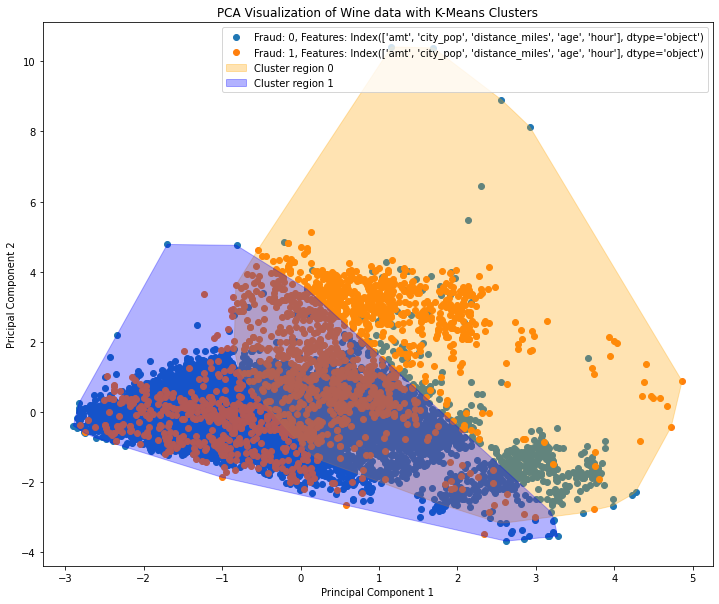

In [254]:
plt.figure(figsize = (12, 10))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label = f"Fraud: {label}, Features: {X_new.columns}")

cluster_colors = ["orange", "blue"]

for cluster_id in range(len(output_clusters)):
    points = np.array(output_clusters[cluster_id]["samples"])[:, :2]
    hull = ConvexHull(points)
    plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], c = cluster_colors[cluster_id], alpha = 0.3, label = f"Cluster region {cluster_id}")

plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Pricipal Component 2")
plt.title(f"PCA Visualization of Wine data with K-Means Clusters")
plt.show()

In [266]:
## Random Forest
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=RANDOM_STATE)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9670050761421319
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3772
           1       0.91      0.83      0.87       562

    accuracy                           0.97      4334
   macro avg       0.94      0.91      0.92      4334
weighted avg       0.97      0.97      0.97      4334



In [265]:
# Perform classification using the model:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_STATE) # Initialize model: be sure to set `randon_state = RANDOM_STATE`
tree_clf.fit(X_train, y_train)# Fit model with training data
y_pred = tree_clf.predict(X_test) # Classify test set samples
acc_tree_clf = accuracy_score(y_test, y_pred)# Compute accuracy scores

### END SOLUTION

print(f"Decision Tree model accuracy: {np.round(acc_tree_clf, 3)}")

Decision Tree model accuracy: 0.946


In [262]:
# Scale-transform training and testing features:
scaler = StandardScaler() # Initialize scaler
X_train_scaled = scaler.fit_transform(X_train) # Standardize training features
X_test_scaled =  scaler.transform(X_test) # Standardize testing features (using scaler.transform)

# Perform classification using the model:
logreg_clf = LogisticRegression(random_state=RANDOM_STATE) # Initialize model
logreg_clf.fit(X_train_scaled, y_train)  # Fit model with training data
y_pred = logreg_clf.predict(X_test_scaled)  # Classify test set samples
acc_logreg_clf = accuracy_score(y_test, y_pred)# Compute accuracy scores

### END SOLUTION

print(f"Logistic Regression model accuracy: {np.round(acc_logreg_clf, 3)}")

Logistic Regression model accuracy: 0.919


In [267]:
#kfold
model=tree_clf

kfold = KFold(n_splits=20, shuffle=True, random_state=RANDOM_STATE)
score = cross_val_score(model, X_new, y_new, cv=kfold)

print(f"Cross-validation scores: {score}")
print(f"Mean score: {score.mean()}")

Cross-validation scores: [0.94329184 0.95159059 0.94744122 0.93499308 0.9501385  0.93628809
 0.94875346 0.93213296 0.93351801 0.94598338 0.94459834 0.9501385
 0.93767313 0.93351801 0.95429363 0.94598338 0.94459834 0.94598338
 0.95290859 0.95152355]
Mean score: 0.9442674988410096


In [268]:
## Plot
# results_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred
# })

# #line
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Actual', y='Predicted', data=results_df, color='blue', alpha=0.6)
# plt.plot([0, 1], [0, 1], 'r--')
# plt.title('Actual vs Predicted Fraud Detection')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.show()

# #bar
# # Reshape the DataFrame to long format 
# results_df_melted = pd.melt(results_df, var_name='Type', value_name='Value')

# # Plo to distinguish between actual and predicted 
# plt.figure(figsize=(10, 6))
# sns.countplot(x='Value', hue='Type', data=results_df_melted, palette={'Actual': 'blue', 'Predicted': 'red'})

# plt.title('Count of Actual vs Predicted Fraud Cases')
# plt.xlabel('Fraud (0 = No, 1 = Yes)')
# plt.ylabel('Count')
# plt.show()
